In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_AN_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0.0,0.0,0.0,2,2,...,0.0,0,0.0,0,0.0,0.0,0.0,0,2.0,0
1,1,1,2,0,0,0.0,3.0,0.0,3,0,...,0.0,0,0.0,0,0.0,2.0,2.0,2,0.0,7
2,2,2,1,0,0,0.0,3.0,0.0,2,0,...,0.0,0,0.0,2,0.0,3.0,3.0,2,0.0,7
3,2,2,2,1,0,0.0,2.0,0.0,2,2,...,0.0,0,0.0,2,0.0,2.0,2.0,2,0.0,7
4,2,2,1,0,0,NaN,2.0,NaN,2,0,...,NaN,0,0.0,3,NaN,2.0,NaN,2,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0.0,0.0,0.0,0,0,...,0.0,0,0.0,3,0.0,0.0,0.0,3,0.0,70
354,2,3,2,0,0,0.0,0.0,0.0,3,2,...,0.0,0,0.0,0,0.0,0.0,0.0,1,0.0,70
355,2,2,2,1,0,0.0,0.0,0.0,0,0,...,0.0,0,0.0,2,0.0,0.0,0.0,2,0.0,70
356,2,1,0,3,0,0.0,0.0,0.0,0,0,...,0.0,0,0.0,0,0.0,0.0,0.0,1,0.0,70


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
int64		column 3	0
int64		column 4	0
int64		column 5	0
float64		column 6	6
float64		column 7	3
float64		column 8	12
int64		column 9	0
int64		column 10	0
int64		column 11	0
float64		column 12	12
int64		column 13	0
int64		column 14	0
int64		column 15	0
int64		column 16	0
int64		column 17	0
int64		column 18	0
int64		column 19	0
int64		column 20	0
int64		column 21	0
float64		column 22	9
int64		column 23	0
int64		column 24	0
float64		column 25	12
int64		column 26	0
float64		column 27	6
int64		column 28	0
float64		column 29	12
float64		column 30	3
float64		column 31	9
int64		column 32	0
float64		column 33	12
int64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,358.000000,358.000000,358.000000,358.000000,358.000000,352.000000,355.000000,346.000000,358.000000,358.000000,...,346.000000,358.000000,352.000000,358.000000,346.000000,355.000000,349.000000,358.000000,346.000000,358.000000
mean,2.078212,1.807263,1.569832,1.354749,0.636872,0.457386,0.163380,0.393064,0.622905,0.530726,...,0.413295,0.474860,0.468750,0.949721,0.473988,0.098592,0.106017,1.877095,0.578035,36.296089
std,0.664865,0.701541,0.900909,1.135062,0.908709,0.962784,0.558762,0.848773,0.990278,0.912352,...,0.867946,0.871705,0.966175,1.129060,0.972470,0.430311,0.476690,0.699324,1.122101,15.324557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

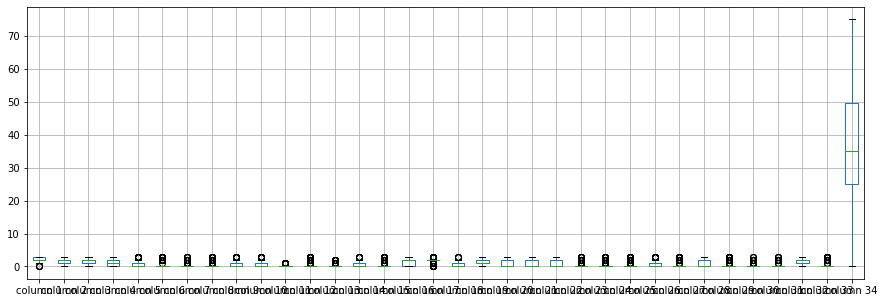

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.078212
column 2      1.807263
column 3      1.569832
column 4      1.354749
column 5      0.636872
column 6      0.457386
column 7      0.163380
column 8      0.393064
column 9      0.622905
column 10     0.530726
column 11     0.122905
column 12     0.424855
column 13     0.142458
column 14     0.547486
column 15     0.315642
column 16     1.368715
column 17     1.955307
column 18     0.511173
column 19     1.287709
column 20     0.662011
column 21     0.983240
column 22     0.647564
column 23     0.298883
column 24     0.368715
column 25     0.413295
column 26     0.474860
column 27     0.468750
column 28     0.949721
column 29     0.473988
column 30     0.098592
column 31     0.106017
column 32     1.877095
column 33     0.578035
column 34    36.296089
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.037946,-0.138063,-0.025978,0.138519,0.180740,...,-0.012629,0.153229,-0.004980,0.038837,-0.004056,-0.034347,-0.006853,0.093026,-0.005048,-0.005028
column 2,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.071360,-0.104957,-0.085430,0.294258,0.295932,...,-0.091320,0.205046,-0.117655,0.023095,-0.119213,-0.019639,-0.025635,-0.008453,-0.136345,0.016006
column 3,0.248062,0.347106,1.000000,-0.058534,0.239778,0.328894,-0.188976,0.285627,0.301187,0.261495,...,0.290443,0.350007,0.290851,-0.252643,0.272433,-0.107248,-0.110106,0.124812,0.280362,0.138493
column 4,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.416490,-0.131206,0.364465,-0.296824,-0.152562,...,0.372415,-0.190548,0.370685,0.003028,0.383060,-0.164010,-0.176462,0.051553,0.393046,0.048053
column 5,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.386235,-0.172502,0.382764,-0.065438,0.013496,...,0.394003,0.002588,0.368760,0.006726,0.371882,-0.146847,-0.159332,0.110295,0.371257,0.081162
column 6,0.037946,-0.071360,0.328894,0.416490,0.386235,1.000000,-0.137218,0.862252,-0.276789,-0.261154,...,0.883666,-0.124804,0.910900,0.095228,0.893948,-0.092260,-0.104143,0.268054,0.903334,0.092336
column 7,-0.138063,-0.104957,-0.188976,-0.131206,-0.172502,-0.137218,1.000000,-0.130277,0.223354,0.000669,...,-0.115610,-0.160607,-0.139451,-0.027834,-0.137116,0.766971,0.824409,-0.100012,-0.130726,-0.361280
column 8,-0.025978,-0.085430,0.285627,0.364465,0.382764,0.862252,-0.130277,1.000000,-0.285771,-0.270453,...,0.884458,-0.114106,0.885380,0.140593,0.872781,-0.075075,-0.100455,0.286646,0.889848,0.100920
column 9,0.138519,0.294258,0.301187,-0.296824,-0.065438,-0.276789,0.223354,-0.285771,1.000000,0.659286,...,-0.270367,0.480594,-0.286757,-0.417851,-0.282814,0.239269,0.250926,-0.079246,-0.278974,-0.078267
column 10,0.180740,0.295932,0.261495,-0.152562,0.013496,-0.261154,0.000669,-0.270453,0.659286,1.000000,...,-0.267239,0.485260,-0.260675,-0.425421,-0.268507,-0.047594,-0.011954,0.027887,-0.261671,0.036412


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+13,34+13+13,34+13+13+13,34+13+13+13+13,34+13+13+13+13+13,34+13+13+13+13+13+13,34+13+13+13+13+13+13+13,34+13+13+13+13+13+13,34+13+13+13+13+13,34+13+13+13+13,34+13+13+13,34+13+13,34+13,34], vae_layer = False, seed = 13)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 76.81550944935192
Epoch: 1 , loss: 76.45854880593039
Epoch: 2 , loss: 76.30866969715466
Epoch: 3 , loss: 76.2050913030451
Epoch: 4 , loss: 76.28720196810636
Epoch: 5 , loss: 75.88918720592152
Epoch: 6 , loss: 76.15168380737305
Epoch: 7 , loss: 75.86611539667302
Epoch: 8 , loss: 75.46467382257634
Epoch: 9 , loss: 74.52076235684481
Epoch: 10 , loss: 71.91517188332297
Epoch: 11 , loss: 69.20143404873934
Epoch: 12 , loss: 68.45516586303711
Epoch: 13 , loss: 67.27287968722257
Epoch: 14 , loss: 66.98228645324707
Epoch: 15 , loss: 67.00555957447399
Epoch: 16 , loss: 66.58269830183549
Epoch: 17 , loss: 66.25401444868608
Epoch: 18 , loss: 65.81813482804732
Epoch: 19 , loss: 65.9317231611772
Epoch: 20 , loss: 65.66597834500399
Epoch: 21 , loss: 65.38880955089222
Epoch: 22 , loss: 65.12119067798962
Epoch: 23 , loss: 65.18909454345703
Epoch: 24 , loss: 64.8986478285356
Epoch: 25 , loss: 65.09562475031072
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.0
column 2      1.0
column 3      1.0
column 4      1.0
column 5      0.0
column 6      0.0
column 7      2.0
column 8      0.0
column 9      3.0
column 10     2.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     1.0
column 15     0.0
column 16     1.0
column 17     1.0
column 18     1.0
column 19     1.0
column 20     0.0
column 21     0.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     1.0
column 32     1.0
column 33     1.0
column 34    12.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0,0,0,0.000000,0.0,0.000000,0,0,...,0.000000,0,0.0,0,0.000000,0.0,0.000000,0,0.000000,0
1,0,0,0,0,0,0.000000,0.0,0.000000,0,0,...,0.000000,0,0.0,0,0.000000,0.0,0.000000,0,0.000000,0
2,0,0,0,0,0,0.000000,0.0,0.000000,0,0,...,0.000000,0,0.0,0,0.000000,0.0,0.000000,0,0.000000,0
3,0,0,0,0,0,0.000000,0.0,0.000000,0,0,...,0.000000,0,0.0,0,0.000000,0.0,0.000000,0,0.000000,0
4,0,0,0,0,0,0.672609,0.0,0.282886,0,0,...,0.414202,0,0.0,0,0.530494,0.0,-2.038266,0,0.638534,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0,0,0,0,0.000000,0.0,0.000000,0,0,...,0.000000,0,0.0,0,0.000000,0.0,0.000000,0,0.000000,0
354,0,0,0,0,0,0.000000,0.0,0.000000,0,0,...,0.000000,0,0.0,0,0.000000,0.0,0.000000,0,0.000000,0
355,0,0,0,0,0,0.000000,0.0,0.000000,0,0,...,0.000000,0,0.0,0,0.000000,0.0,0.000000,0,0.000000,0
356,0,0,0,0,0,0.000000,0.0,0.000000,0,0,...,0.000000,0,0.0,0,0.000000,0.0,0.000000,0,0.000000,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(6.843449657638452, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.009027433593827853

In [18]:
new_df.iloc[66,:]

column 1      2.0
column 2      0.0
column 3      0.0
column 4      3.0
column 5      0.0
column 6      0.0
column 7      0.0
column 8      0.0
column 9      0.0
column 10     0.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     0.0
column 15     2.0
column 16     2.0
column 17     2.0
column 18     0.0
column 19     0.0
column 20     0.0
column 21     3.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     0.0
column 32     2.0
column 33     0.0
column 34    22.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1,1,1,1,0.000000,0.0,0.000000,2,2,...,0.000000,0,0.0,0,0.000000,0.0,0.000000,0,2.000000,0
1,1,1,2,0,0,0.000000,3.0,0.000000,3,0,...,0.000000,0,0.0,0,0.000000,2.0,2.000000,2,0.000000,7
2,2,2,1,0,0,0.000000,3.0,0.000000,2,0,...,0.000000,0,0.0,2,0.000000,3.0,3.000000,2,0.000000,7
3,2,2,2,1,0,0.000000,2.0,0.000000,2,2,...,0.000000,0,0.0,2,0.000000,2.0,2.000000,2,0.000000,7
4,2,2,1,0,0,0.672609,2.0,0.282886,2,0,...,0.414202,0,0.0,3,0.530494,2.0,-0.038266,2,0.638534,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2,0,2,1,0.000000,0.0,0.000000,0,0,...,0.000000,0,0.0,3,0.000000,0.0,0.000000,3,0.000000,70
354,2,3,2,0,0,0.000000,0.0,0.000000,3,2,...,0.000000,0,0.0,0,0.000000,0.0,0.000000,1,0.000000,70
355,2,2,2,1,0,0.000000,0.0,0.000000,0,0,...,0.000000,0,0.0,2,0.000000,0.0,0.000000,2,0.000000,70
356,2,1,0,3,0,0.000000,0.0,0.000000,0,0,...,0.000000,0,0.0,0,0.000000,0.0,0.000000,1,0.000000,70


In [20]:
imputations[-1].to_excel("DERM_AN_1(imp).xlsx", index=False, header=False)